## Social Data Science Project

###  <span style="color:#044e8a"> The Impact of Video Length and Interactivity on YouTube Channel Size and Video Popularity:</span> 
### <span style="color:#044e8a"> Analysis of Greece's Most-Viewed Channels </span>

<span style="color: white; background-color: #044e8a; padding: 2px; border-radius: 3px;">
Objective: </span>

To explore how video length, content type, and interactivity affect channel size and video popularity among the most-viewed YouTube channels in Greece using data from the YouTube API.

Byun et al. (2023). The effect of YouTube comment interaction on video engagement: focusing on interactivity centralization and creators' interactivity. Available at: https://www.emerald.com/insight/content/doi/10.1108/oir-04-2022-0217/full/html

<span style="color: white; background-color: #044e8a; padding: 2px; border-radius: 3px;">
TABLE OF CONTENTS</span>

|**No.**| **Chapter** | **Sections** |
|:-------:|:-------------------|:-----------------|
|**5**| **Visualizations**|
|||**5.1. Univariate Plots**|
|||5.1.1 Channels Basic Statistics|
|||5.1.2 Distribution of Video Views|
|||5.1.3 Video Basic Statistics Over Time (Views,Likes, Comments)|
|||5.1.4 Video Length Categories|
|||5.1.5 Video Upload Over Time|
||| 5.1.6 Log Comments|
||| 5.1.7 Popularity|
|||**5.2. Bivariate Plots**|
|||5.2.1. Video Length (Predictor) vs Views (Outcome)|
|||5.2.2. Interactivity (Predictor) vs Comments (Outcome)|

<span style="color: white; background-color: #145c02; padding: 2px; border-radius: 3px;">
Libraries used: </span>

*this section lists all the libraries required for data collection, cleaning, analysis, and visualization in this project.*

<span style="color:#145c02"> **Data Cleaning, Processing, Analysis** </span> 

In [3]:
import pandas as pd #for working with structured datasets
import numpy as np #for numerical computations
import datetime  # For handling date/time conversions and computations
from isodate import parse_duration #for handling ISO 8601 format commonly used in APIs

In [4]:
import hashlib #provides secure hashing algorithms like sha256 for anonymizing sensitive data

In [5]:
from collections import Counter

In [6]:
import statsmodels.api as sm #for statistical analysis and regression modeling
from statsmodels.formula.api import ols #for building regression models using formulas

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [8]:
from sklearn.preprocessing import StandardScaler #for normalizing/standardizing data
from sklearn.model_selection import train_test_split #for splitting data into training/testing sets
from sklearn.metrics import mean_squared_error, accuracy_score #for model evaluation

<span style="color:#145c02">**Visualization**</span> 

In [9]:
import matplotlib as plt #core library for visualizations
import matplotlib.pyplot as plt #for plotting and customizing figures
import seaborn as sns #for statistical data visualizations
import plotly.express as px #for interactive and advanced plotes
from wordcloud import WordCloud #for generating word clouds,text analysis

# <span style="color:#1d2224"> **5 | Visualizations** </span>

### 5.1. | Univariate Plots

### 5.1.1 | Channels Basic Statistics 

In [22]:
sns.set_style("darkgrid")

visualchannel4_subscribers = channel_data.sort_values(by='Subscribers', ascending=False)
visualchannel4_viewcount = channel_data.sort_values(by='ViewCount', ascending=False)
visualchannel4_videos = channel_data.sort_values(by='Total_Videos', ascending=False)

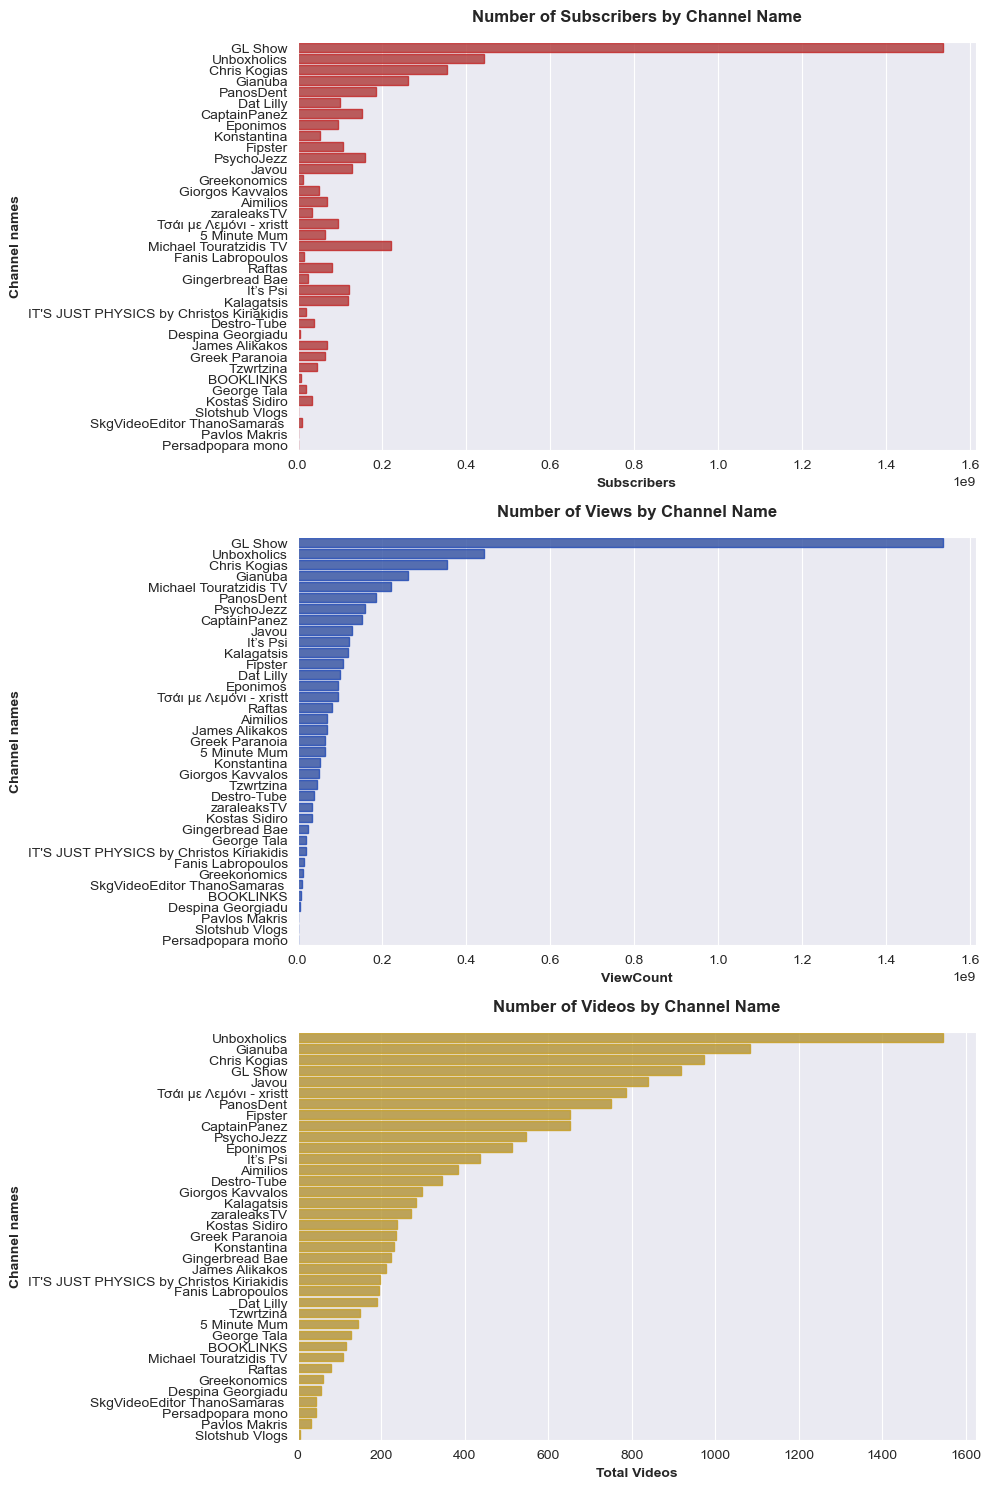

In [25]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=False)

#Plot_1: Subscribers
sns.barplot(
    y='Channel_name',
    x='ViewCount',
    data=visualchannel4_subscribers,
    color="#c22323",
    edgecolor="#c22323",
    alpha=0.8,
    ax=axes[0]
)
axes[0].set_title("Number of Subscribers by Channel Name", fontweight="bold", pad=15)
axes[0].set_xlabel("Subscribers", fontweight="bold")
axes[0].set_ylabel("Channel names", fontweight="bold")

#Plot_2: ViewCount
sns.barplot(
    y='Channel_name',
    x='ViewCount',
    data=visualchannel4_viewcount,
    color="#1d47b3",
    edgecolor="#1d47b3",
    alpha=0.8,
    ax=axes[1]
)
axes[1].set_title("Number of Views by Channel Name", fontweight="bold", pad=15)
axes[1].set_xlabel("ViewCount", fontweight="bold")
axes[1].set_ylabel("Channel names", fontweight="bold")

#Plot_3: Total Videos
sns.barplot(
    y='Channel_name',
    x='Total_Videos',
    data=visualchannel4_videos,
    color="#c79d1e",
    edgecolor="#c79d1e",
    alpha=0.8,
    ax=axes[2]
)
axes[2].set_title("Number of Videos by Channel Name", fontweight="bold", pad=15)
axes[2].set_xlabel("Total Videos", fontweight="bold")
axes[2].set_ylabel("Channel names", fontweight="bold")

plt.tight_layout()
plt.show()

### 5.1.2 | Distribution of Video Views

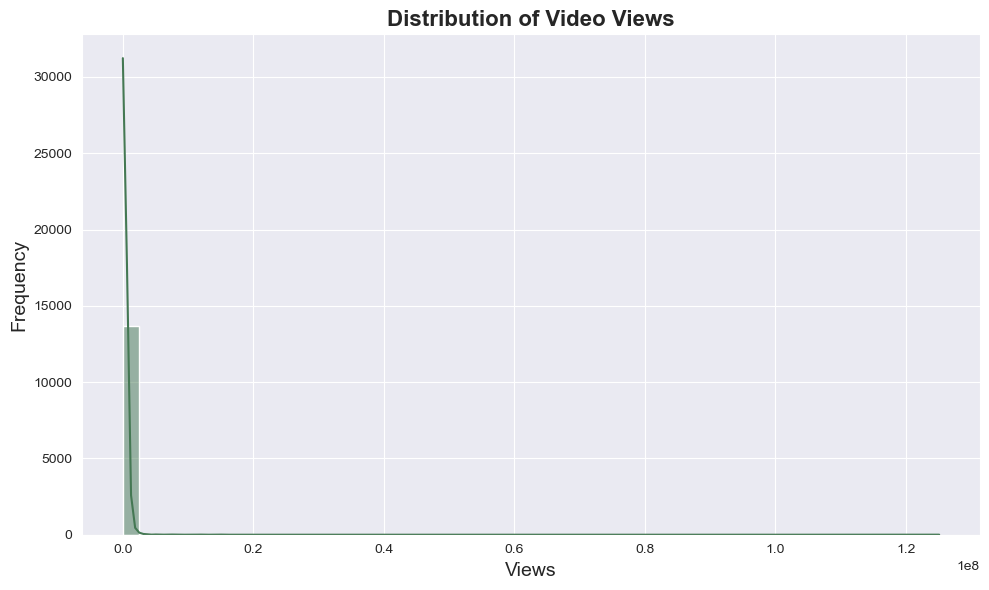

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(video_data['Views'], bins=50, kde=True, color="#447853")
plt.title("Distribution of Video Views", fontsize=16, fontweight="bold")
plt.xlabel("Views", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.tight_layout()
plt.show()

### 5.1.3. | Video Basic Statistics Over Time (Views,Likes, Comments)

In [27]:
visual_timetrends = video_data.groupby('Published_Year')[['Views', 'Likes', 'Comments']].sum().reset_index()

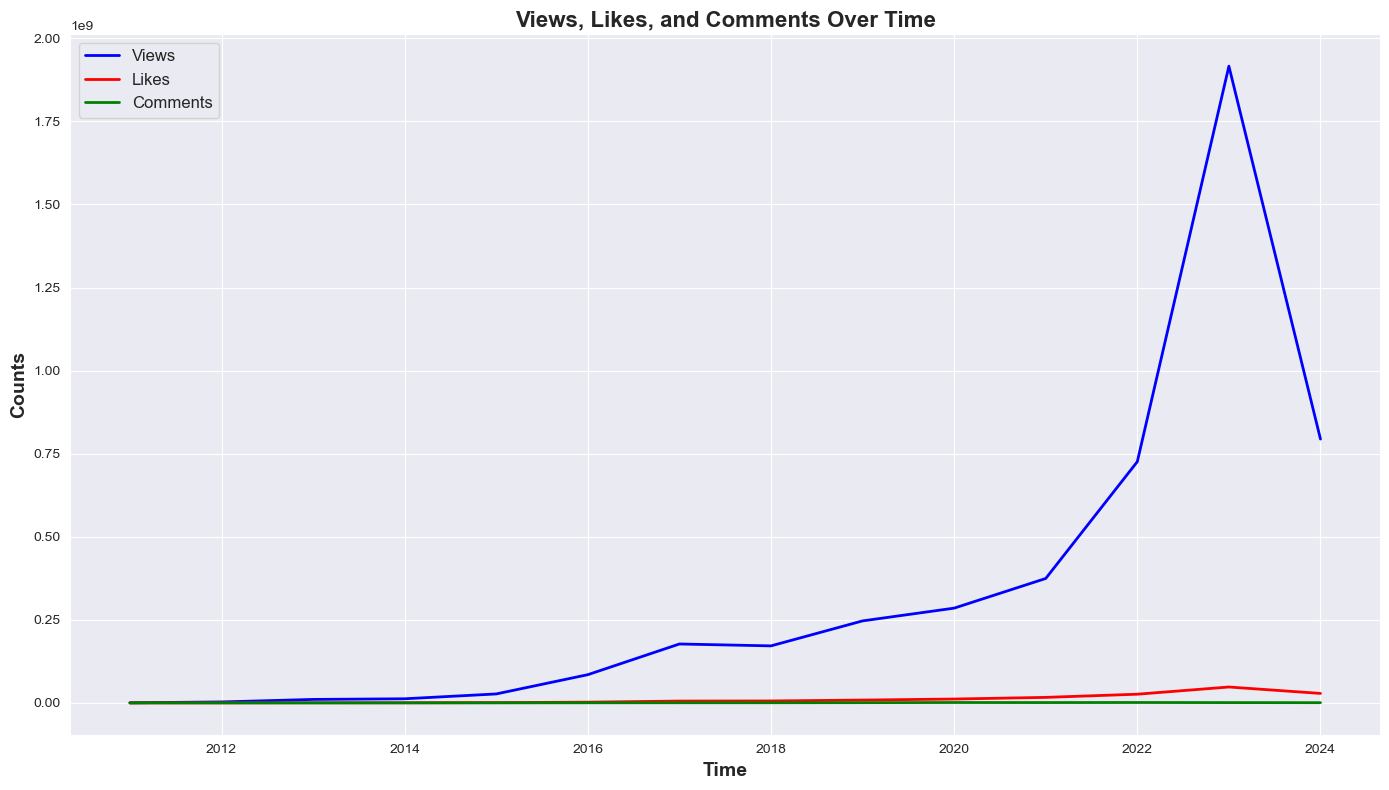

In [28]:
plt.figure(figsize=(14, 8))

plt.plot(visual_timetrends['Published_Year'], visual_timetrends['Views'], label='Views', color='blue', linewidth=2)
plt.plot(visual_timetrends['Published_Year'], visual_timetrends['Likes'], label='Likes', color='red', linewidth=2)
plt.plot(visual_timetrends['Published_Year'], visual_timetrends['Comments'], label='Comments', color='green', linewidth=2)

plt.xlabel('Time', fontweight='bold', fontsize=14)
plt.ylabel('Counts', fontweight='bold', fontsize=14)
plt.title('Views, Likes, and Comments Over Time', fontweight='bold', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()

plt.show()

### 5.1.4. | Video Length Categories 

In [29]:
visual_video_length = video_data['Video_Length_Category'].value_counts()

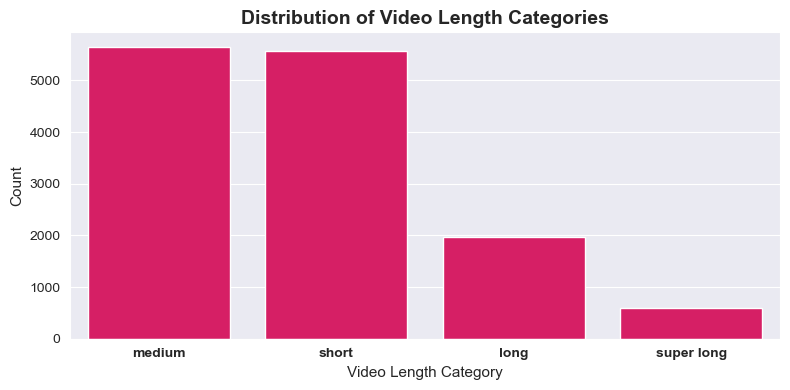

In [30]:
plt.figure(figsize=(8, 4))
sns.barplot(
    x=visual_video_length.index,
    y=visual_video_length.values,
    color="#f5005e"
)

plt.xlabel("Video Length Category", fontsize=11)
plt.ylabel("Count", fontsize=11)
plt.title("Distribution of Video Length Categories", fontweight="bold", fontsize=14)
plt.xticks(fontweight="bold")
plt.tight_layout()

plt.show()

### 5.1.5. | Video Upload Over Time  

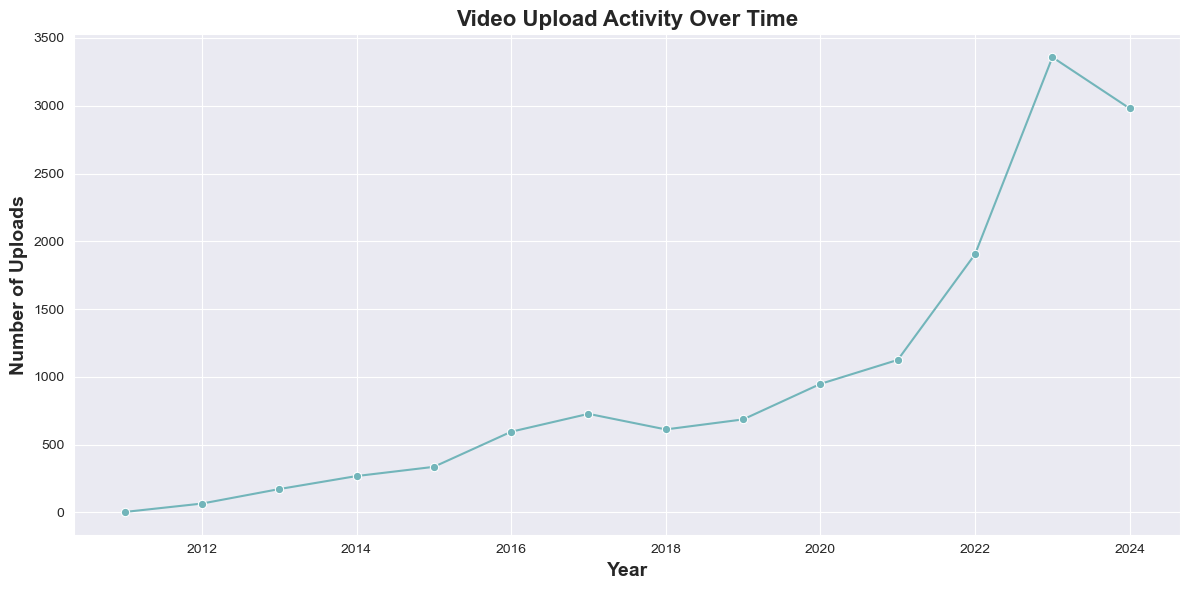

In [31]:
upload_activity = video_data['Published_Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=upload_activity.index, y=upload_activity.values, marker='o', color="#72B5BA")

# Customize the plot
plt.title("Video Upload Activity Over Time", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=14, fontweight='bold')
plt.ylabel("Number of Uploads", fontsize=14, fontweight='bold')
plt.grid(True)
plt.tight_layout()

plt.show()

### 5.1.6. | Log Comments   

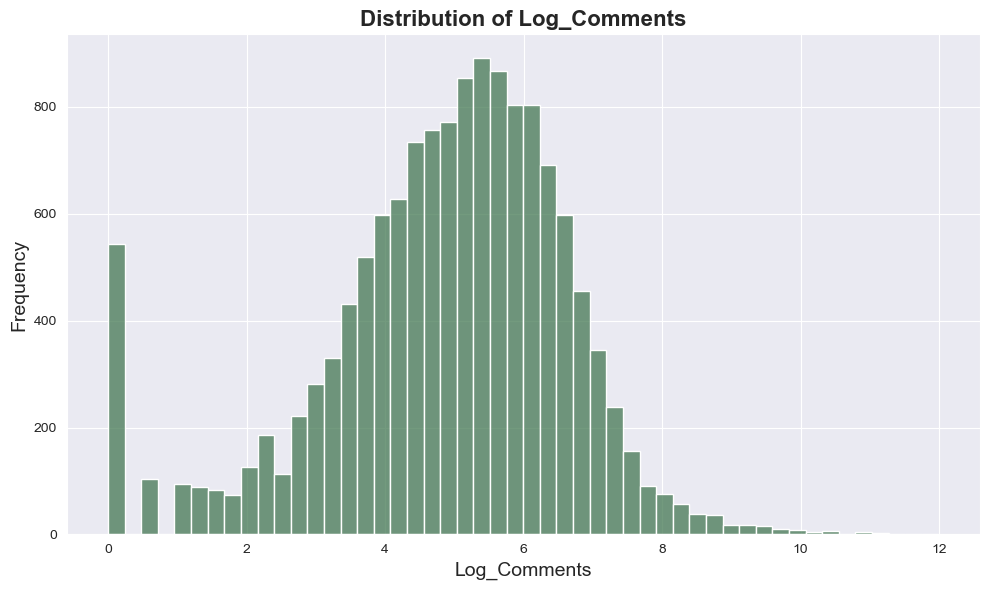

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(video_data['Log_Comments'], bins=50, color="#447853")
plt.title("Distribution of Log_Comments", fontsize=16, fontweight="bold")
plt.xlabel("Log_Comments", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.tight_layout()
plt.grid(True)
plt.show()

### 5.1.7. | Popularity 

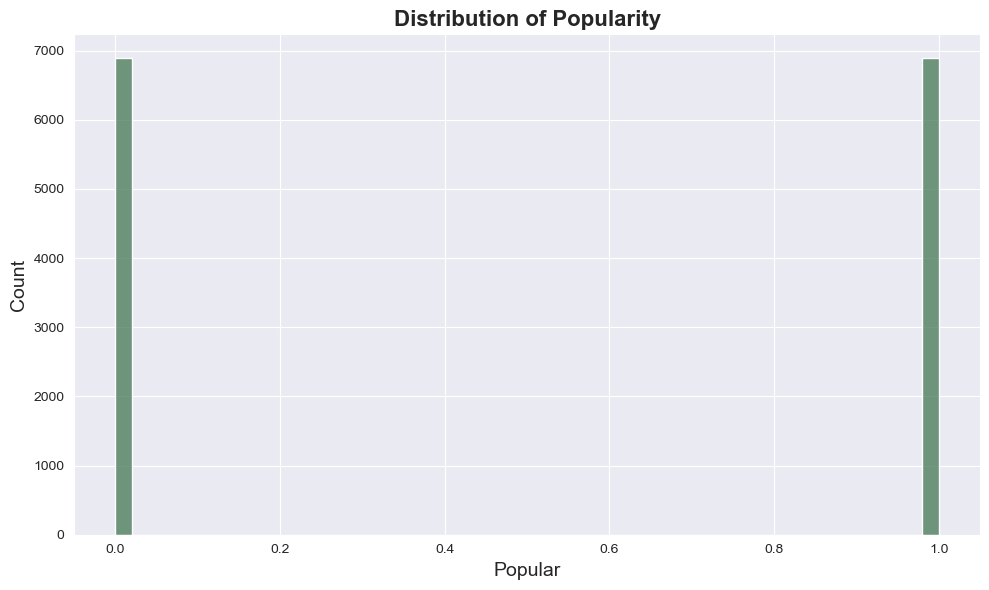

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(video_data['Popular'], bins=50, color="#447853")
plt.title("Distribution of Popularity", fontsize=16, fontweight="bold")
plt.xlabel("Popular", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.tight_layout()
plt.grid(True)
plt.show()

### 4.2. | Bivariate Plots Basic Statistics 

###  4.2.1. | Video Length (Predictor) vs Views (Outcome)

/var/folders/qt/nkv93n510wlcddjjxc58klyr0000gn/T/ipykernel_1085/3309721145.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Video_Length_Category', y='Views', data=video_data, palette="Blues")


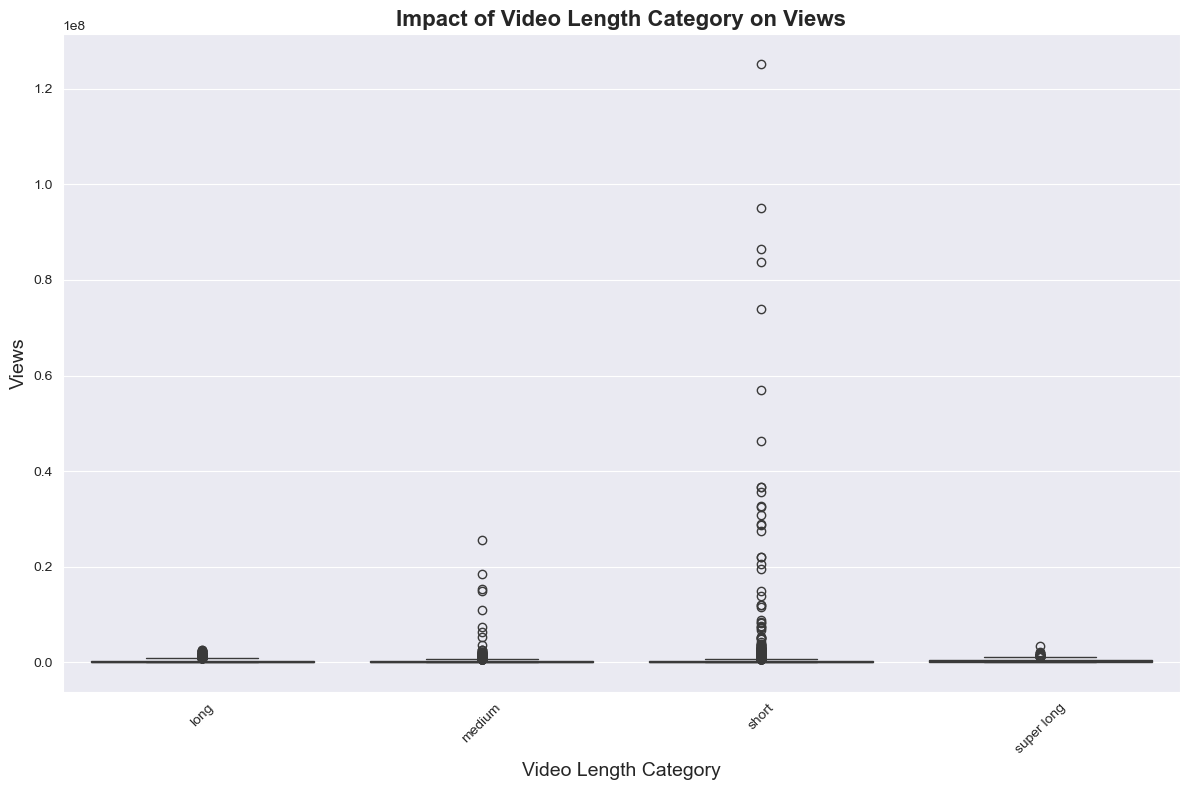

In [37]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Video_Length_Category', y='Views', data=video_data, palette="Blues")
plt.title("Impact of Video Length Category on Views", fontsize=16, fontweight="bold")
plt.xlabel("Video Length Category", fontsize=14)
plt.ylabel("Views", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 4.2.2. | Interactivity (Predictor) vs Comments (Outcome)

/var/folders/qt/nkv93n510wlcddjjxc58klyr0000gn/T/ipykernel_4780/1300544198.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:gray'` for the same effect.

  sns.barplot(


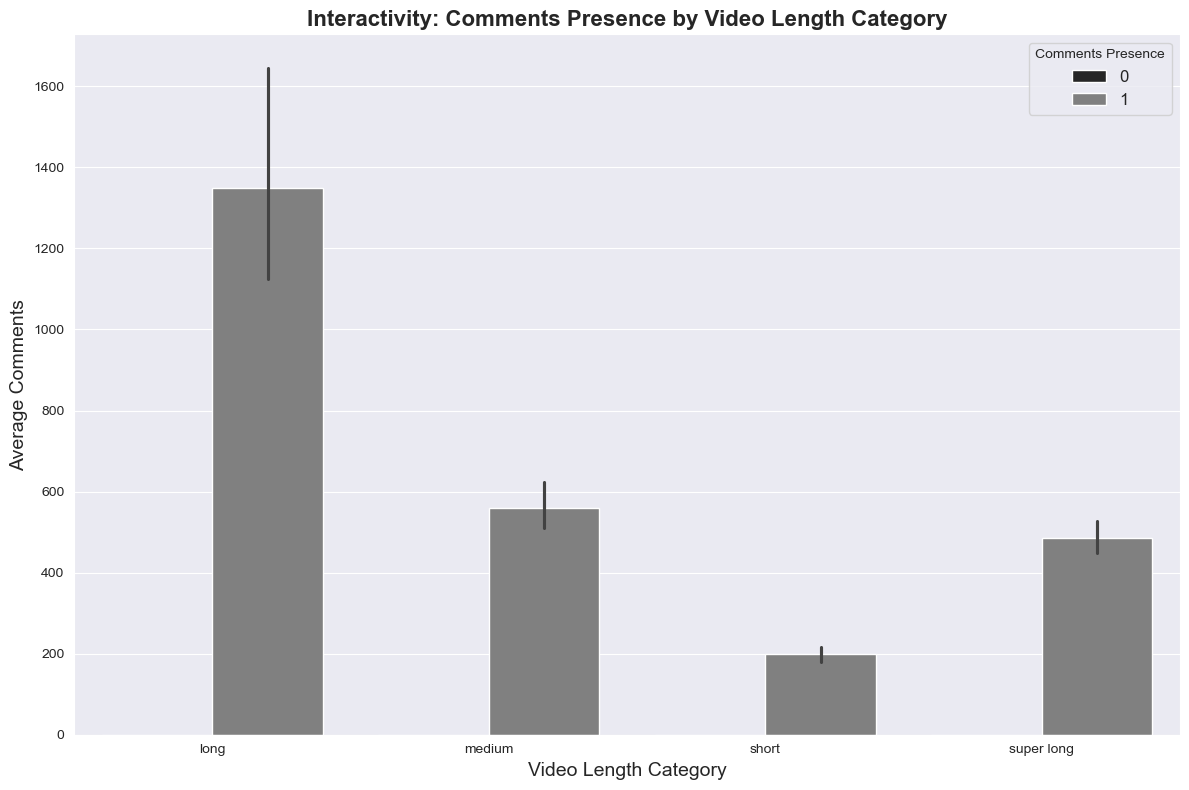

In [34]:
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Video_Length_Category', 
    y='Comments', 
    hue='Comments_Presence', 
    data=video_data, 
    color="gray"
)
plt.title("Interactivity: Comments Presence by Video Length Category", fontsize=16, fontweight="bold")
plt.xlabel("Video Length Category", fontsize=14)
plt.ylabel("Average Comments", fontsize=14)
plt.legend(title="Comments Presence", fontsize=12)
plt.tight_layout()
plt.show()